## Import data

In [1]:
import pandas as pd
import numpy as np
from nltk.corpus import stopwords
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from nltk.stem import PorterStemmer 
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
import re

stop_words = set(stopwords.words('english')) 

sentiment140=pd.read_pickle('data/s140_clean_28nov.pkl')
moviereview=pd.read_pickle('data/mr_clean_28nov.pkl')
climatechange=pd.read_pickle('data/cc_clean_28nov.pkl')

## Train S140 + MR and Test on CC

In [3]:
data =  pd.concat([sentiment140, moviereview], ignore_index=True)

In [13]:
data_small = data.sample(10000)
print(data_small)

                                                      text    target  \
1620538  How in the name of decency did this film ever ...  negative   
1124046  leland grant replies to me on facebook!  hehe ...  positive   
114862   feel asleep all day on the beach with my beach...  negative   
1447345  @kimkardashian; going 2 Dash on Monday 2 meet ...  positive   
1108576  has little black dots floating thru his brain....  positive   
...                                                    ...       ...   
957355   Another beautiful day  Looking forward to writ...  positive   
302311   @michelle_wells Thanks Michelle!  Actually, th...  negative   
1343167  @Mattdavelewis I hope you took some pictures. ...  positive   
1481083                   @faulko1 good morning, lovely  x  positive   
1104652                    @Teacoa do some jumpping jacks   positive   

                                                     lemma  length  \
1620538  [name, decency, film, ever, get, made, br, br,...      9

In [14]:
X_train = data_small.iloc[:, 4]
y_train = data_small.iloc[:, 1]

climatechange_transf = climatechange.dropna()

X_test = climatechange_transf.iloc[:, 5]

y_test = climatechange_transf.iloc[:, 2]

In [4]:
from sklearn.metrics import confusion_matrix

result = []
conf = np.matrix([[0, 0], [0, 0]])
y_pred = []
for i in range(0, 5):
    data_small = data.sample(10000)

    X_train = data_small.iloc[:, 4]
    y_train = data_small.iloc[:, 1]

    climatechange_transf = climatechange.dropna()

    X_test = climatechange_transf.iloc[:, 5]

    y_test = climatechange_transf.iloc[:, 2]
    
    
    svc = Pipeline([('vect', CountVectorizer()),
        ('tfidf', TfidfTransformer()),
        ('clf', SVC(C=1000, tol=1, kernel='rbf')),
    ])

    svc.fit(X_train, y_train)


    y_pred = svc.predict(X_test)
    result.append(accuracy_score(y_test, y_pred))
    print(accuracy_score(y_test, y_pred))
    conf += np.matrix(confusion_matrix(y_test, y_pred))

print(result)

/Users/jordisaleilles/miniconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.6849773107236685


/Users/jordisaleilles/miniconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.7227131597802723


/Users/jordisaleilles/miniconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.7219966563171722


/Users/jordisaleilles/miniconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.6966802006209697


/Users/jordisaleilles/miniconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.6947695247193695
[0.6849773107236685, 0.7227131597802723, 0.7219966563171722, 0.6966802006209697, 0.6947695247193695]


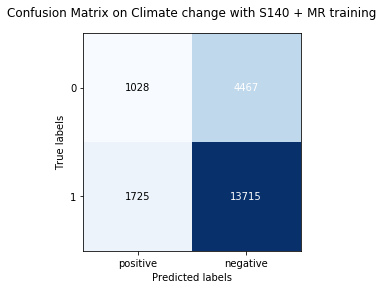

In [42]:
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_confusion_matrix

fig, ax = plot_confusion_matrix(conf_mat=np.array(conf))

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix on Climate change with S140 + MR training')
ax.set_xticks([0,1])
ax.set_xticklabels(["positive", "negative"])

plt.show()


In [30]:
data_small = data.sample(10000)

X_train = data_small.iloc[:, 4]
y_train = data_small.iloc[:, 1]

climatechange_transf = climatechange.dropna()

X_test = climatechange_transf.iloc[:, 5]

y_test = climatechange_transf.iloc[:, 2]
    
param = {
    'tfidf__norm': ['l2'],
    # sigmoid
    'clf__tol':[1, 1e-1, 1e-2, 1e-3]
    }

svc = Pipeline([('vect', CountVectorizer()),
        ('tfidf', TfidfTransformer()),
        ('clf', SVC(C=1000, kernel='rbf')),
        ])

clf = GridSearchCV(svc, param, cv=3)

clf.fit(X_train, y_train)


sorted(clf.cv_results_.keys())
scores_mean = clf.cv_results_['mean_test_score']
print('Best Params: ', clf.best_params_)

/Users/jordisaleilles/miniconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/jordisaleilles/miniconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/jordisaleilles/miniconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/jordisaleilles/min

Best Params:  {'clf__tol': 1, 'tfidf__norm': 'l2'}


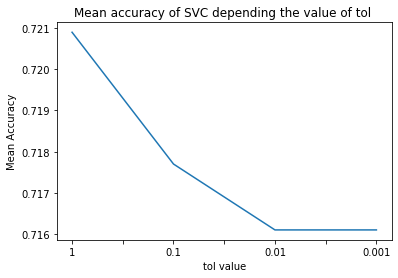

In [47]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

tol_tick = [0, 1, '', 1e-1, '', 1e-2, '', 1e-3]
tol = [1, 2, 3, 4]
plt.plot(tol, scores_mean)
ax.set_xticklabels(tol_tick)
plt.title("Mean accuracy of SVC depending the value of tol ")
plt.xlabel("tol value")
plt.ylabel("Mean Accuracy")
plt.show()

In [44]:
result = []

for i in range(0, 5):
    data_small = data.sample(10000)

    X_train = data_small.iloc[:, 4]
    y_train = data_small.iloc[:, 1]

    climatechange_transf = climatechange.dropna()

    X_test = climatechange_transf.iloc[:, 5]

    y_test = climatechange_transf.iloc[:, 2]
    
    y_test2.extend(y_test)
    
    svc = Pipeline([('vect', CountVectorizer()),
        ('tfidf', TfidfTransformer()),
        ('clf', SVC(C=10, tol=1, kernel='rbf', gamma='auto')),
    ])

    svc.fit(X_train, y_train)


    y_pred = svc.predict(X_test)
    result.append(accuracy_score(y_test, y_pred))
    print(accuracy_score(y_test, y_pred))

print(result)

0.26247910198232627
0.7375208980176737
0.26247910198232627
0.7375208980176737
0.7375208980176737
[0.26247910198232627, 0.7375208980176737, 0.26247910198232627, 0.7375208980176737, 0.7375208980176737]


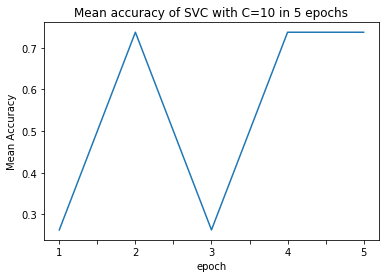

In [51]:
fig, ax = plt.subplots()
epoch_tick = [0, 1, '', 2, '', 3, '', 4, '', 5]

plt.plot(np.arange(0,5), result)
plt.title("Mean accuracy of SVC with C=10 in 5 epochs")
plt.xlabel("epoch")
plt.ylabel("Mean Accuracy")
ax.set_xticklabels(epoch_tick)

plt.show()

In [52]:
result = []
y_pred = []
for i in range(0, 5):
    data_small = data.sample(10000)

    X_train = data_small.iloc[:, 4]
    y_train = data_small.iloc[:, 1]

    climatechange_transf = climatechange.dropna()

    X_test = climatechange_transf.iloc[:, 5]

    y_test = climatechange_transf.iloc[:, 2]
    
    y_test2.extend(y_test)
    
    svc = Pipeline([('vect', CountVectorizer()),
        ('tfidf', TfidfTransformer()),
        ('clf', SVC(C=100, tol=1, kernel='rbf', gamma='auto')),
    ])

    svc.fit(X_train, y_train)


    y_pred = svc.predict(X_test)
    result.append(accuracy_score(y_test, y_pred))
    print(accuracy_score(y_test, y_pred))

print(result)

0.26247910198232627
0.7375208980176737
0.26247910198232627
0.7375208980176737
0.26247910198232627
[0.26247910198232627, 0.7375208980176737, 0.26247910198232627, 0.7375208980176737, 0.26247910198232627]


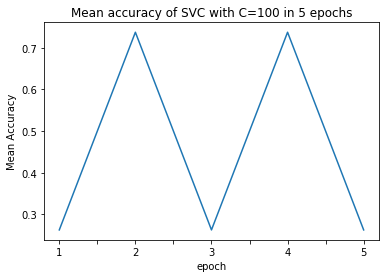

In [53]:
fig, ax = plt.subplots()
epoch_tick = [0, 1, '', 2, '', 3, '', 4, '', 5]

plt.plot(np.arange(0,5), result)
plt.title("Mean accuracy of SVC with C=100 in 5 epochs")
plt.xlabel("epoch")
plt.ylabel("Mean Accuracy")
ax.set_xticklabels(epoch_tick)

plt.show()

In [54]:
result = []
y_pred = []
for i in range(0, 5):
    data_small = data.sample(10000)

    X_train = data_small.iloc[:, 4]
    y_train = data_small.iloc[:, 1]

    climatechange_transf = climatechange.dropna()

    X_test = climatechange_transf.iloc[:, 5]

    y_test = climatechange_transf.iloc[:, 2]
    
    y_test2.extend(y_test)
    
    svc = Pipeline([('vect', CountVectorizer()),
        ('tfidf', TfidfTransformer()),
        ('clf', SVC(C=1000, tol=1, kernel='rbf', gamma='auto')),
    ])

    svc.fit(X_train, y_train)


    y_pred = svc.predict(X_test)
    result.append(accuracy_score(y_test, y_pred))
    print(accuracy_score(y_test, y_pred))

print(result)

0.7162646286123716
0.7179364700262718
0.7112491043706711
0.6864103176498686
0.6754239312156676
[0.7162646286123716, 0.7179364700262718, 0.7112491043706711, 0.6864103176498686, 0.6754239312156676]


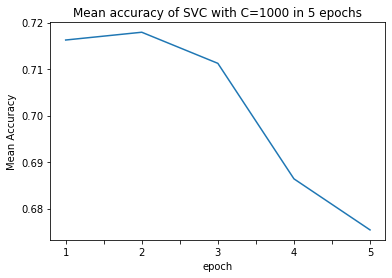

In [55]:
fig, ax = plt.subplots()
epoch_tick = [0, 1, '', 2, '', 3, '', 4, '', 5]

plt.plot(np.arange(0,5), result)
plt.title("Mean accuracy of SVC with C=1000 in 5 epochs")
plt.xlabel("epoch")
plt.ylabel("Mean Accuracy")
ax.set_xticklabels(epoch_tick)

plt.show()

We see that with small value of C, the data does not generalize well and always get the same accuracy score.
We then take an highter value of C, to make the optimizer to choose a smaller-margin hyperplane.

## Train and Test dataset separatly

### Sentiment140

In [9]:
print(sentiment140.shape)

(1600498, 5)


In [2]:
from sklearn.model_selection import train_test_split


In [5]:
from sklearn.metrics import confusion_matrix

result = []
conf = np.matrix([[0, 0], [0, 0]])

for i in range(0, 5):
    data_small = sentiment140.sample(10000)

    
    X = data_small.iloc[:, 4]
    y = data_small.iloc[:, 1]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

    
    svc = Pipeline([('vect', CountVectorizer()),
        ('tfidf', TfidfTransformer()),
        ('clf', SVC(C=1000, tol=1, kernel='rbf', gamma='auto')),
    ])

    svc.fit(X_train, y_train)


    y_pred = svc.predict(X_test)
    result.append(accuracy_score(y_test, y_pred))
    print(accuracy_score(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred))
    conf += np.matrix(confusion_matrix(y_test, y_pred))

print(result)

0.733030303030303
[[1046  557]
 [ 324 1373]]
0.7284848484848485
[[1111  516]
 [ 380 1293]]
0.7281818181818182
[[1168  478]
 [ 419 1235]]
0.7175757575757575
[[1145  509]
 [ 423 1223]]
0.7121212121212122
[[1124  512]
 [ 438 1226]]
[0.733030303030303, 0.7284848484848485, 0.7281818181818182, 0.7175757575757575, 0.7121212121212122]


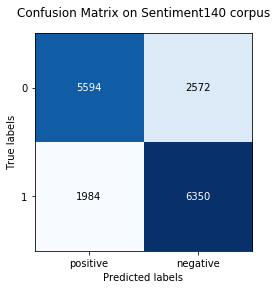

In [7]:
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_confusion_matrix

fig, ax = plot_confusion_matrix(conf_mat=np.array(conf))

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix on Sentiment140 corpus')
ax.set_xticks([0,1])
ax.set_xticklabels(["positive", "negative"])

plt.show()

### MovieReview

In [8]:
print(moviereview.shape)

(50000, 5)


In [8]:
from sklearn.metrics import confusion_matrix

result = []
conf = np.matrix([[0, 0], [0, 0]])

for i in range(0, 5):
    data_small = moviereview.sample(10000)

    
    X = data_small.iloc[:, 4]
    y = data_small.iloc[:, 1]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

    
    svc = Pipeline([('vect', CountVectorizer()),
        ('tfidf', TfidfTransformer()),
        ('clf', SVC(C=1000, tol=1, kernel='rbf', gamma='auto')),
    ])

    svc.fit(X_train, y_train)


    y_pred = svc.predict(X_test)
    result.append(accuracy_score(y_test, y_pred))
    print(accuracy_score(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred))
    conf += np.matrix(confusion_matrix(y_test, y_pred))

print(result)

0.8187878787878788
[[1176  449]
 [ 149 1526]]
0.8290909090909091
[[1212  433]
 [ 131 1524]]
0.8187878787878788
[[1207  460]
 [ 138 1495]]
0.8342424242424242
[[1218  412]
 [ 135 1535]]
0.8312121212121212
[[1211  434]
 [ 123 1532]]
[0.8187878787878788, 0.8290909090909091, 0.8187878787878788, 0.8342424242424242, 0.8312121212121212]


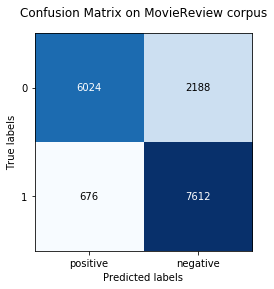

In [9]:
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_confusion_matrix

fig, ax = plot_confusion_matrix(conf_mat=np.array(conf))

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix on MovieReview corpus')
ax.set_xticks([0,1])
ax.set_xticklabels(["positive", "negative"])

plt.show()

### Climate Change

In [10]:
print(climatechange.shape)

(6027, 7)


In [20]:
from sklearn.metrics import confusion_matrix

climatechange_transf = climatechange.dropna()

X = climatechange_transf.iloc[:, 5]
y = climatechange_transf.iloc[:, 2]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

    
svc = Pipeline([('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', SVC(C=1000, tol=1, kernel='rbf', gamma='auto')),
])

svc.fit(X_train, y_train)


y_pred = svc.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
conf = confusion_matrix(y_test, y_pred)


0.8198263386396527
[[150 210]
 [ 39 983]]


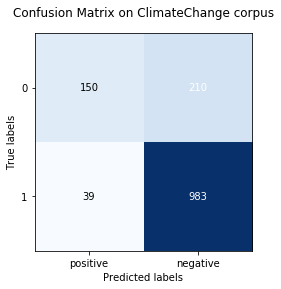

In [22]:
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_confusion_matrix

fig, ax = plot_confusion_matrix(conf_mat=np.array(conf))

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix on ClimateChange corpus')
ax.set_xticks([0,1])
ax.set_xticklabels(["positive", "negative"])

plt.show()

## Combination of training and testing
### Train on S140 and Test on ClimateChange

In [2]:
from sklearn.metrics import confusion_matrix

result = []
conf = np.matrix([[0, 0], [0, 0]])

for i in range(0, 5):
    data_small = sentiment140.sample(10000)

    
    X_train = data_small.iloc[:, 4]
    y_train = data_small.iloc[:, 1]
    
    climatechange_transf = climatechange.dropna()

    X_test = climatechange_transf.iloc[:, 5]
    y_test = climatechange_transf.iloc[:, 2]
    
    svc = Pipeline([('vect', CountVectorizer()),
        ('tfidf', TfidfTransformer()),
        ('clf', SVC(C=1000, tol=1, kernel='rbf', gamma='auto')),
    ])

    svc.fit(X_train, y_train)


    y_pred = svc.predict(X_test)
    result.append(accuracy_score(y_test, y_pred))
    print(accuracy_score(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred))
    conf += np.matrix(confusion_matrix(y_test, y_pred))

print(result)

0.7088607594936709
[[ 204  895]
 [ 324 2764]]
0.719847145927872
[[ 149  950]
 [ 223 2865]]
0.7031287317888704
[[ 198  901]
 [ 342 2746]]
0.6716025794124671
[[ 197  902]
 [ 473 2615]]
0.6484356341055648
[[ 378  721]
 [ 751 2337]]
[0.7088607594936709, 0.719847145927872, 0.7031287317888704, 0.6716025794124671, 0.6484356341055648]


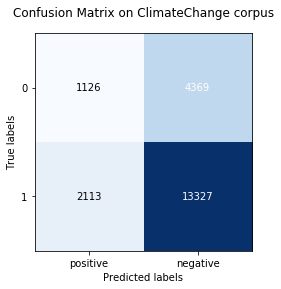

In [4]:
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_confusion_matrix

fig, ax = plot_confusion_matrix(conf_mat=np.array(conf))

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix on ClimateChange corpus')
ax.set_xticks([0,1])
ax.set_xticklabels(["positive", "negative"])

plt.show()

### Train on MR and Test on ClimateChange

In [5]:
from sklearn.metrics import confusion_matrix

result = []
conf = np.matrix([[0, 0], [0, 0]])

for i in range(0, 5):
    data_small = moviereview.sample(10000)

    
    X_train = data_small.iloc[:, 4]
    y_train = data_small.iloc[:, 1]
    
    climatechange_transf = climatechange.dropna()

    X_test = climatechange_transf.iloc[:, 5]
    y_test = climatechange_transf.iloc[:, 2]
    
    svc = Pipeline([('vect', CountVectorizer()),
        ('tfidf', TfidfTransformer()),
        ('clf', SVC(C=1000, tol=1, kernel='rbf', gamma='auto')),
    ])

    svc.fit(X_train, y_train)


    y_pred = svc.predict(X_test)
    result.append(accuracy_score(y_test, y_pred))
    print(accuracy_score(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred))
    conf += np.matrix(confusion_matrix(y_test, y_pred))

print(result)

0.7377597325053737
[[  47 1052]
 [  46 3042]]
0.730833532362073
[[  56 1043]
 [  84 3004]]
0.729639359923573
[[  73 1026]
 [ 106 2982]]
0.7375208980176737
[[  42 1057]
 [  42 3046]]
0.7372820635299737
[[  46 1053]
 [  47 3041]]
[0.7377597325053737, 0.730833532362073, 0.729639359923573, 0.7375208980176737, 0.7372820635299737]


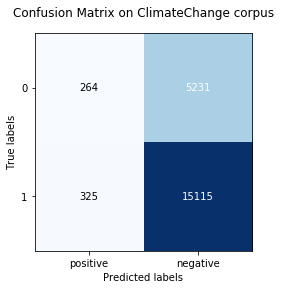

In [6]:
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_confusion_matrix

fig, ax = plot_confusion_matrix(conf_mat=np.array(conf))

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix on ClimateChange corpus')
ax.set_xticks([0,1])
ax.set_xticklabels(["positive", "negative"])

plt.show()

### Train on ClimateChange and Test on S140

In [38]:
from sklearn.metrics import confusion_matrix

climatechange_transf = climatechange.dropna()

X_train = climatechange_transf.iloc[:, 5]
y_train = climatechange_transf.iloc[:, 2]
    
svc = Pipeline([('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', SVC(C=1000, tol=1, kernel='rbf', gamma='auto')),
])

svc.fit(X_train, y_train)

X_test = sentiment140[sentiment140['target'] != 'neutral'].iloc[:, 4]
y_test = sentiment140[sentiment140['target'] != 'neutral'].iloc[:, 1]
    
    
y_pred = svc.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
conf = np.matrix(confusion_matrix(y_test, y_pred))

print(result)

-
0.49998156663598603
[[ 63181 736996]
 [ 63213 736969]]
[0.7377597325053737, 0.730833532362073, 0.729639359923573, 0.7375208980176737, 0.7372820635299737]


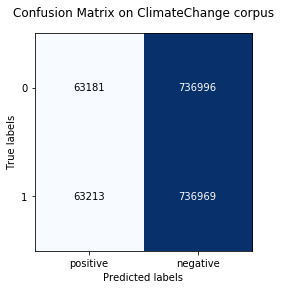

In [39]:
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_confusion_matrix

fig, ax = plot_confusion_matrix(conf_mat=np.array(conf))

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix on ClimateChange corpus')
ax.set_xticks([0,1])
ax.set_xticklabels(["positive", "negative"])

plt.show()

### Train on ClimateChange and Test on MR

In [40]:
from sklearn.metrics import confusion_matrix

climatechange_transf = climatechange.dropna()

X_train = climatechange_transf.iloc[:, 5]
y_train = climatechange_transf.iloc[:, 2]
    
svc = Pipeline([('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', SVC(C=1000, tol=1, kernel='rbf', gamma='auto')),
])

svc.fit(X_train, y_train)

X_test = moviereview.iloc[:, 4]
y_test = moviereview.iloc[:, 1]
    
    
y_pred = svc.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
conf = np.matrix(confusion_matrix(y_test, y_pred))

print(result)

0.5169
[[ 2197 22803]
 [ 1352 23648]]
[0.7377597325053737, 0.730833532362073, 0.729639359923573, 0.7375208980176737, 0.7372820635299737]


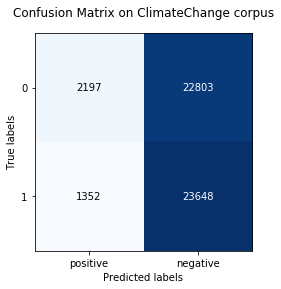

In [41]:
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_confusion_matrix

fig, ax = plot_confusion_matrix(conf_mat=np.array(conf))

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix on ClimateChange corpus')
ax.set_xticks([0,1])
ax.set_xticklabels(["positive", "negative"])

plt.show()